In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi,sin,cos,ceil,log,sqrt

#Abstract

Finding roots of functions is one of the most important numerical computations with a variety of applications. There are a lot of different root-finding methods, and all of them may be more efficient than others depending on the behavior of a function. The goal of this assignment was to investigate 4 methods of finding roots, both bracketing and open methods, and to compare their performances. In the end Newton-Raphson method turned out to be the fastest and bisection method the slowest

#Introduction
There are 2 types of root-finding methods:
* Bracketing methods require an interval as an input, they are slow but reliable(i.e. always converge). In this assignment two bracketing methods are investigated: bisection and false position.

* Open methods, which only require a single point as an entry, they are faster than bracketing methods but may not always converge. Two open methods will be investigated: Newton-Raphson and fixed-point iteration.

In general from the form of a function it is hard to tell exactly which method is going to be better than others.

#Methodology:

* The function is graphed in order to locate the vicinity of a root.
* Each method is coded separately and iterated until precision of $10^{-10}$ is achieved.
* Relative error vs iteration number graph is constructed
* Results are compared and analysed

##Part 1

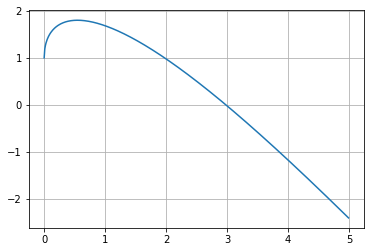

In [16]:
def f(x):
  return 2*np.sin(np.sqrt(x))-x+1

x=np.arange(0,5,0.01)
plt.plot(x,f(x))
plt.grid()
plt.show()

It can be seen that root is located somewhere around x=3

##Part 2

In [97]:
def bisection(f,xl,xu,tol,imax):
  error=[]
  xr=xu
  rootFound=False
  for i in range(imax):
    xrold=xr
    xr=(xl+xu)/2
    e=abs((xr-xrold)/xr)
    error.append(e)
    if f(xr)==0 or e<tol:
      rootFound=True
      break
    if f(xl)*f(xr)<0:
      xu=xr
    if f(xr)*f(xu)<0:
      xl=xr
  if rootFound is False:
    print("The root cannot be find with given accuracy within maximum number of iterations")
  return xr,error

root_bisection,error_bisection=bisection(f,0,5,10**(-10),100)
print(root_bisection)

2.9762156881042756


##Part 3

In [98]:
def falsepos(f,xl,xu,tol,imax):
  xr=xu
  error=[]
  rootFound=False
  for i in range(imax):
    xrold=xr
    xr=xu-(f(xu)*(xu-xl))/(f(xu)-f(xl))
    if f(xr)==0:
      rootFound=True
      break
    if f(xl)*f(xr)<0:
      xu=xr
    if f(xr)*f(xu)<0:
      xl=xr
    e=abs((xrold-xr)/xr)
    error.append(e)
    if e<tol:
      rootFound=True            
      break
  if rootFound is False:
    print("The root cannot be find with given accuracy within maximum number of iterations")
  return xr,error

root_falsepos,error_falsepos=falsepos(f,0,5,10**(-10),100)
print(root_falsepos)


2.9762156880315875


##Part 4

In [99]:
def nr(f,df,x0,tol,imax):
  rootFound=False
  error=[]
  for i in range(imax):
    xr=x0-f(x0)/df(x0)
    e=abs((xr-x0)/xr)
    error.append(e)
    if e<tol:
      rootFound=True
      break
    x0=xr
  if rootFound is False:
    print("The root cannot be find with given accuracy within maximum number of iterations")
  return x0,error

def df(x):
  return np.cos(np.sqrt(x))/np.sqrt(x)-1

root_nr,error_nr=nr(f,df,1,10**(-10),100)
print(root_nr)

2.976215688041108


##Part 5

In [100]:
def g(x):
  return 2*np.sin(np.sqrt(x))+1

def dg(x):
  return np.cos(np.sqrt(x))/np.sqrt(x)

def fixedpi(g,x0,tol,imax):
  rootfound=False
  x=[]
  error=[]
  x.append(x0)
  for i in range(imax):
    xnew=g(x[i])
    x.append(xnew)
    e=abs((x[i+1]-x[i])/x[i+1])
    error.append(e)
    if e<tol:
      rootFound=True
      break
  if rootFound is False:
    print("The root cannot be find with given accuracy within maximum number of iterations")
  n=len(x)
  xr=x[n-1]
  return xr,error

print(root_fixedpi)
root_fixedpi,error_fixedpi=fixedpi(g,1,10**(-10),100)

2.9762156880341646


##Part 6

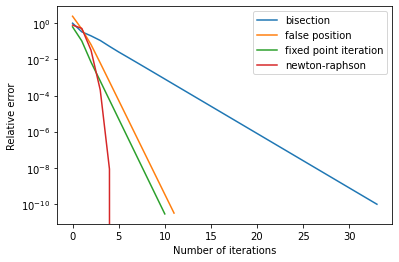

In [101]:
plt.yscale("log")
plt.plot(error_bisection,label='bisection')
plt.plot(error_falsepos,label='false position')
plt.plot(error_fixedpi,label='fixed point iteration')
plt.plot(error_nr,label='newton-raphson')
plt.xlabel("Number of iterations")
plt.ylabel("Relative error")
plt.legend()
plt.show()

##Part 7

The graph above demonstrates that Newton-Raphson converges quadratically and other methods converge linearly. Since Newton-Raphson method uses more information than other methods, namely the derivative of a function, it converges faster. This result was expected since it was also proven in the Lecture

##Part 8

Under assumption that all methods converge the maximum precision is only limited by the precision of Python data types. By default it is $10^{-16}$

## Part 9

Newton-Raphson method should be the fastest for this equation. However this result is only valid for these specific initial values. If the interval for bracketing methods is significantly smaller they may outperform Newton-Raphson. If initial position for Newton-Raphson is in other place, it may even start to diverge or converge significantly slower.

#References

https://www.youtube.com/watch?v=dAUiJE_DgEI